<a href="https://colab.research.google.com/github/adnan119/EasyOCR-Implementation/blob/master/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip uninstall opencv-contrib-python

Uninstalling opencv-contrib-python-4.4.0.44:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python-4.4.0.44.dist-info/*
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python.libs/libQt5Concurrent-21c64331.so.5.15.0
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python.libs/libQt5Core-d92f2856.so.5.15.0
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python.libs/libQt5Gui-ca084835.so.5.15.0
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python.libs/libQt5Test-9d4ee57e.so.5.15.0
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python.libs/libQt5Widgets-0e1d98b5.so.5.15.0
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python.libs/libQt5XcbQpa-70670cdb.so.5.15.0
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python.libs/libX11-xcb-1ae4fd0e.so.1.0.0
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python.libs/libXau-00ec42fe.so.6.0.0


In [4]:
!pip freeze

absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.2.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.2.1
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.3
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0rc2
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distributed==1.25.3
Django==3.1.1
dlib==19.18.0
dm-t

In [5]:
!pip install easyocr

     |████████████████████████████████| 48.4MB 63kB/s 


In [6]:
%cd /content/drive/My\ Drive/EasyOCR/

/content/drive/My Drive/EasyOCR


In [7]:
!ls

ocr-1.jpg


In [13]:
from easyocr import Reader
import cv2

In [14]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [28]:
langs = "en".split(",")
print("[INFO] OCR'ing with the following languages: {}".format(langs))
# load the input image from disk
image = cv2.imread("ocr-1.jpg")
# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(langs, gpu=True)
results = reader.readtext(image, detail = 0, paragraph=True)

[INFO] OCR'ing with the following languages: ['en']
[INFO] OCR'ing input image...


[INFO] 0.0753: 20,000 LEAGUES UNDER THE SEA
[INFO] 0.1468: to shout, Help!
[INFO] 0.3411: choking, but he managed
[INFO] 0.9754: Help!"
[INFO] 0.9894: words
[INFO] 0.9953: stunned
[INFO] 0.5308: these
[INFO] 0.9822: hear
[INFO] 0.9891: I
[INFO] 0.9638: to
[INFO] 0.8386: was
[INFO] 0.1364: screamed out in French. So I did
[INFO] 0.4028: a fel-
[INFO] 0.9608: have
[INFO] 0.3048: after all! And
[INFO] 0.5285: low countryman
[INFO] 0.4441: on board
[INFO] 0.9783: in
[INFO] 0.4250: had forgotten the
[INFO] 0.1733: his moment of death, he
[INFO] 0.1238: strange speech he had used on board. He had
[INFO] 0.9861: gasped
[INFO] 0.5512: his native lan-
[INFO] 0.6344: his dying
[INFO] 0.9815: words
[INFO] 0.9726: in
[INFO] 0.9302: guage!
[INFO] 0.3496: for. Nothing
[INFO] 0.4350: But the poor
[INFO] 0.2804: was done
[INFO] 0.7320: man
[INFO] 0.2351: a powerful grip
[INFO] 0.2998: save him from such
[INFO] 0.9802: could
[INFO] 0.2673: Nemo hurled himself
[INFO] 0.2958: Nevertheless, Captain
[INFO]

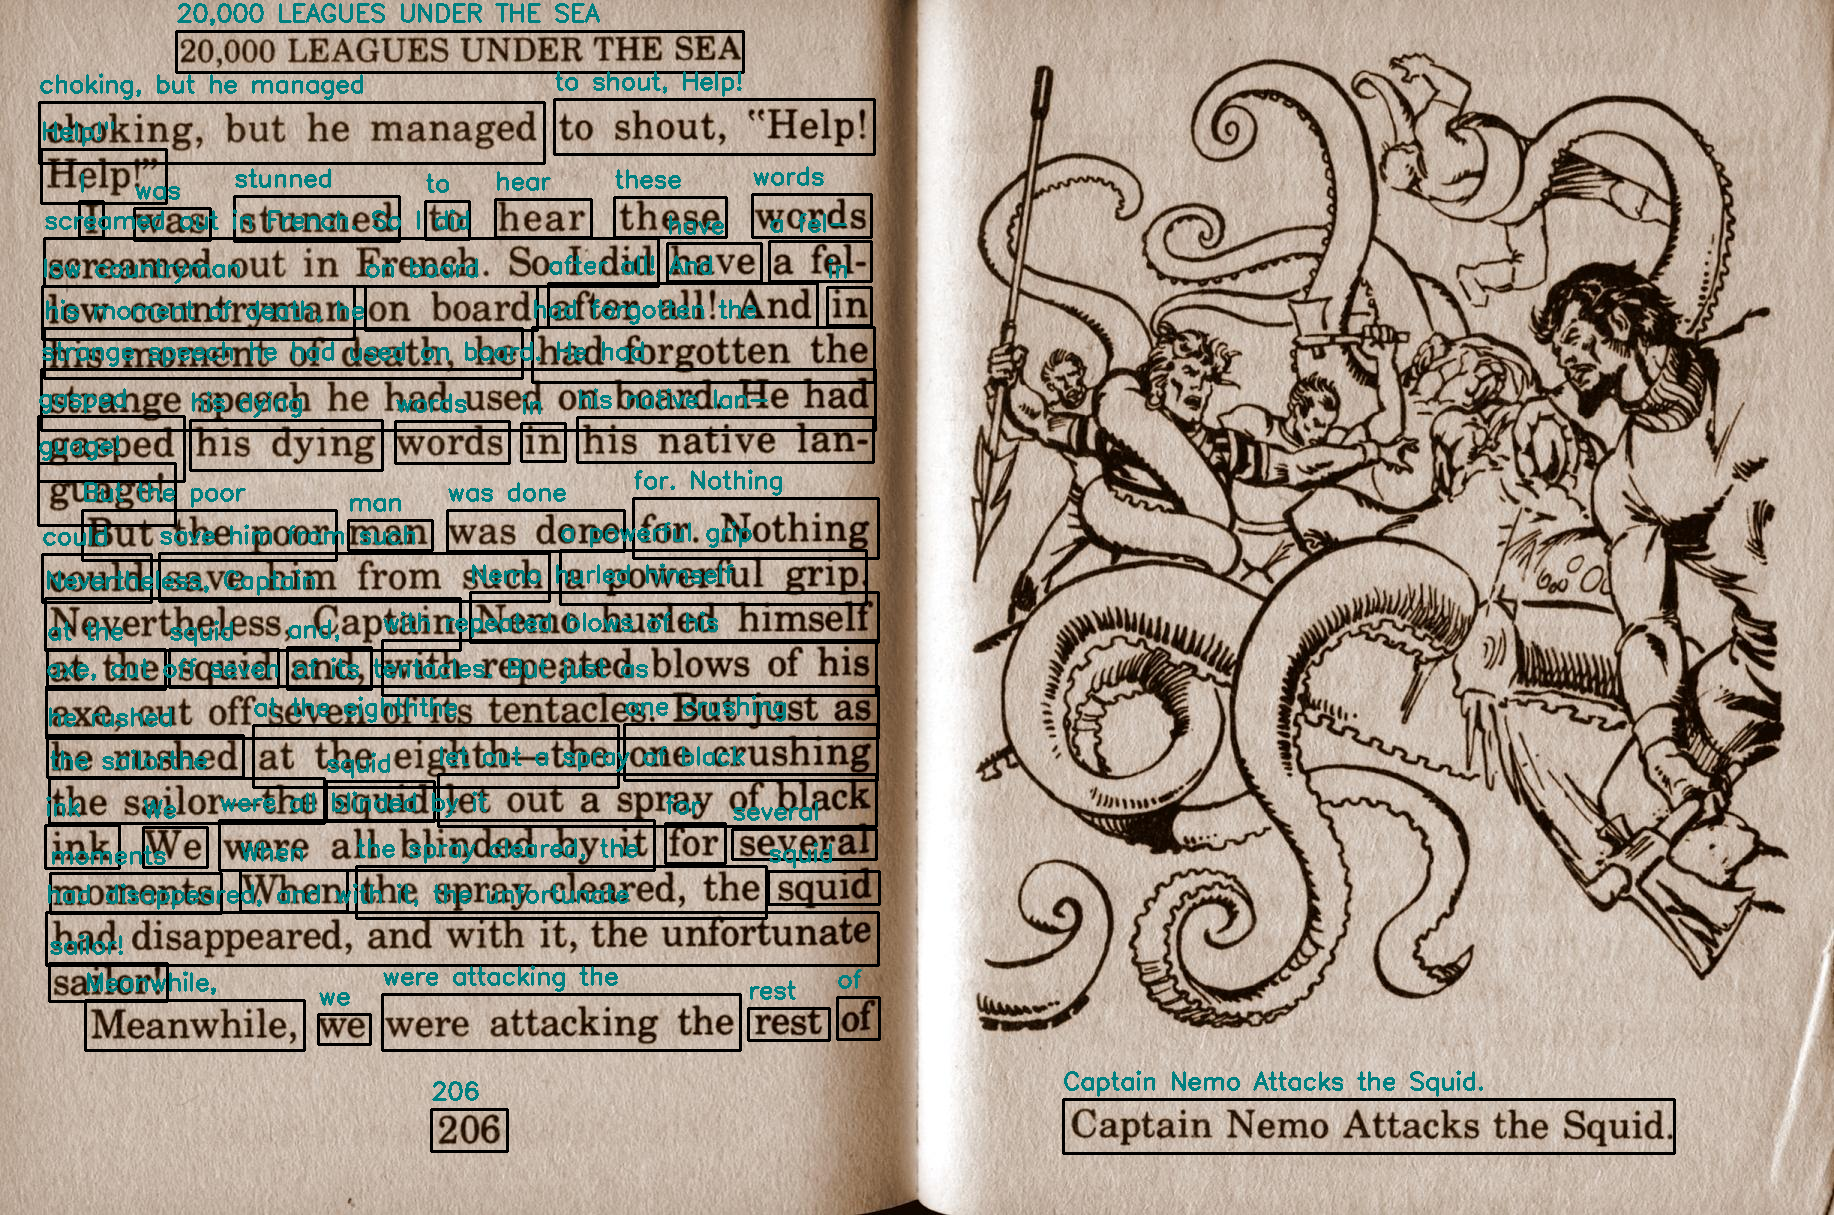

In [27]:
# loop over the results
from google.colab.patches import cv2_imshow

for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))
	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))
	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 0, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (128, 128, 0), 2)
# show the output image
cv2_imshow(image)

In [29]:
results

['20,000 LEAGUES UNDER THE SEA',
 'choking, but he managed to shout, Help! Help!" I was stunned to hear these words screamed out in French. So I did have a fel- low countryman on board after all! And in his moment of death, he had forgotten the strange speech he had used on board. He had gasped his dying words in his native lan- guage! But the poor man was done for. Nothing could save him from such a powerful grip Nevertheless, Captain Nemo hurled himself at the squid and, with repeated blows of his axe, cut off seven of its tentacles. But just as he rushed at the eighththe one crushing the sailorthe squid let out a spray of black ink We were all blinded by it for several moments When the spray cleared, the squid had disappeared, and with it, the unfortunate sailor! Meanwhile, we were attacking the rest of',
 'Captain Nemo Attacks the Squid.',
 '206']